# *ScreenSense: Kids’ Screentime Visualization*

**Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Load the Dataset**

In [3]:

df = pd.read_csv("/content/Indian_Kids_Screen_Time.csv")

df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


**Dataset Shape (Size)**

In [4]:

df.shape


(9712, 8)

**Column Names**

In [5]:
df.columns


Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

**Summary Statistics**

In [6]:
df.describe()


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


**Missing Values**

In [7]:
# Count
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [8]:
# Percentage of missing values
(df.isnull().mean() * 100).round(2)


,0
Age,0.00
Gender,0.00
Avg_Daily_Screen_Time_hr,0.00
Primary_Device,0.00
Exceeded_Recommended_Limit,0.00
Educational_to_Recreational_Ratio,0.00
Health_Impacts,33.13
Urban_or_Rural,0.00


**Categorical Columns Inspection**

In [ ]:
categorical_cols = [
    "Gender",
    "Primary_Device",
    "Health_Impacts",
    "Urban_or_Rural",
    "Exceeded_Recommended_Limit"
]

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))



Unique values in Gender:
Gender
Male      4942
Female    4770
Name: count, dtype: int64

Unique values in Primary_Device:
Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

Unique values in Health_Impacts:
Health_Impacts
NaN                                              3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, 

**Age & Screen Time Validity Check**

In [9]:

df["Age"].min(), df["Age"].max()


(8, 18)

In [10]:

(df["Avg_Daily_Screen_Time_hr"] < 0).sum()


np.int64(0)

**Duplicate Records Check**

In [11]:
df.duplicated().sum()


np.int64(44)

**Check Educational vs Recreational Ratio Range**

In [12]:
print("Minimum Ratio:", df["Educational_to_Recreational_Ratio"].min())
print("Maximum Ratio:", df["Educational_to_Recreational_Ratio"].max())


Minimum Ratio: 0.3
Maximum Ratio: 0.6


**Distribution Overview**

In [13]:
print("\nBasic Distribution of Screen Time:")
print(df["Avg_Daily_Screen_Time_hr"].describe())



Basic Distribution of Screen Time:
count    9712.000000
mean        4.352837
std         1.718232
min         0.000000
25%         3.410000
50%         4.440000
75%         5.380000
max        13.890000
Name: Avg_Daily_Screen_Time_hr, dtype: float64


**Age Distribution**

1. Age Distribution


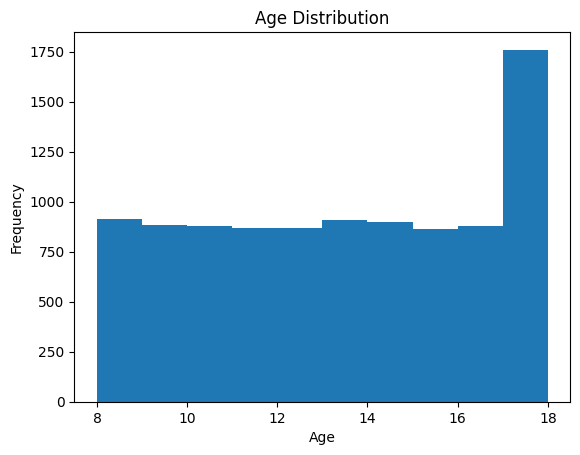

In [14]:
print("1. Age Distribution")

plt.figure()
plt.hist(df["Age"], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**Daily Screen Time Distribution**

2. Daily Screen Time Distribution


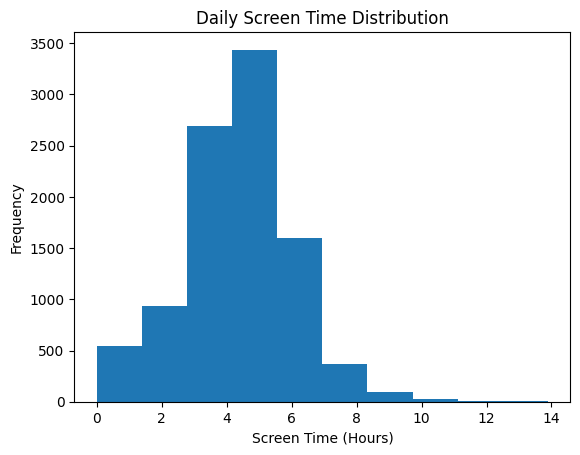

In [15]:
print("2. Daily Screen Time Distribution")

plt.figure()
plt.hist(df["Avg_Daily_Screen_Time_hr"], bins=10)
plt.title("Daily Screen Time Distribution")
plt.xlabel("Screen Time (Hours)")
plt.ylabel("Frequency")
plt.show()


**Gender **Distribution

3. Gender Distribution


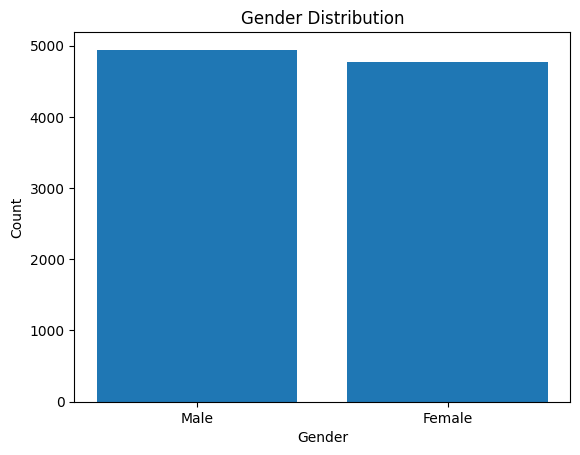

In [16]:
print("3. Gender Distribution")

gender_counts = df["Gender"].value_counts()

plt.figure()
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


**Urban vs Rural Distribution**

4. Urban vs Rural Distribution


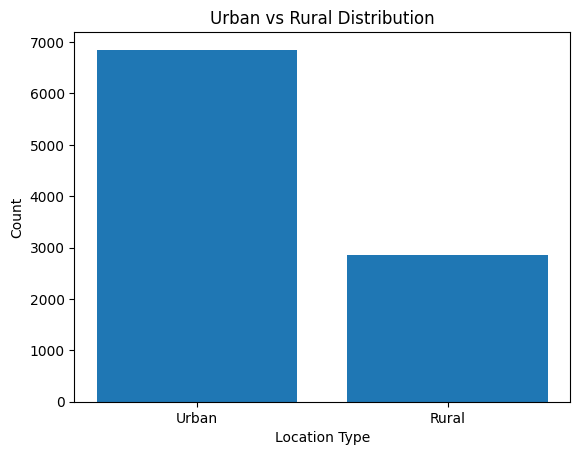

In [17]:
print("4. Urban vs Rural Distribution")

location_counts = df["Urban_or_Rural"].value_counts()

plt.figure()
plt.bar(location_counts.index, location_counts.values)
plt.title("Urban vs Rural Distribution")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.show()


**Screen Time by Device Type**

5. Average Screen Time by Device Type


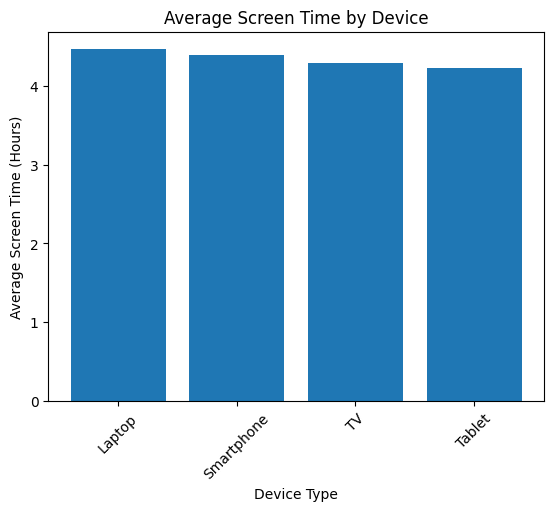

In [18]:
print("5. Average Screen Time by Device Type")

device_avg = df.groupby("Primary_Device")["Avg_Daily_Screen_Time_hr"].mean()

plt.figure()
plt.bar(device_avg.index, device_avg.values)
plt.title("Average Screen Time by Device")
plt.xlabel("Device Type")
plt.ylabel("Average Screen Time (Hours)")
plt.xticks(rotation=45)
plt.show()


**Correlation Matrix**

In [19]:
print("7. Correlation Matrix")

correlation = df.corr(numeric_only=True)

print("\nCorrelation Matrix:")
print(correlation)


7. Correlation Matrix

Correlation Matrix:
                                        Age  Avg_Daily_Screen_Time_hr  \
Age                                1.000000                  0.118328   
Avg_Daily_Screen_Time_hr           0.118328                  1.000000   
Exceeded_Recommended_Limit         0.159173                  0.664950   
Educational_to_Recreational_Ratio -0.488617                 -0.087552   

                                   Exceeded_Recommended_Limit  \
Age                                                  0.159173   
Avg_Daily_Screen_Time_hr                             0.664950   
Exceeded_Recommended_Limit                           1.000000   
Educational_to_Recreational_Ratio                   -0.126643   

                                   Educational_to_Recreational_Ratio  
Age                                                        -0.488617  
Avg_Daily_Screen_Time_hr                                   -0.087552  
Exceeded_Recommended_Limit                          